# Системи аутоматског управљања - 3. вежбе
## Одзив система на одскочну и импулсну побуду.
## Полови система и стабилност.

ЗАДАТАК 1.

За функцију преноса модела мотора једносмерне струје G(s): 

\begin{equation*}
G(s) =  K_m\frac{1}{T_ms+1},
\end{equation*}

одредити одзив система на јединичну импулсну и јединичну одскочну побуду.

Приказати одзиве за $K_m=1$ $T_m=1$, $T_m=5$ и $T_m=10$.

In [1]:
import numpy as np;
import scipy as sp;
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
#Km=1

Gs1=signal.lti([1],[1,1]) #Tm1=1
Gs2=signal.lti([1],[5,1]) #Tm2=5
Gs3=signal.lti([1],[10,1]) #Tm3=10

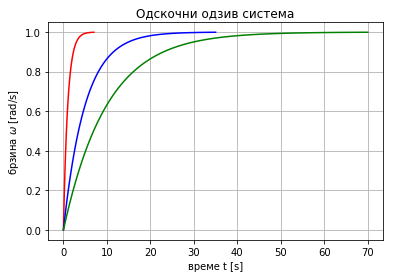

In [3]:
#odskocni odziv
t1,u1=Gs1.step()
t2,u2=Gs2.step()
t3,u3=Gs3.step()

plt.title("Одскочни одзив система")
plt.ylabel("брзина $\omega$ [rad/s]")
plt.xlabel("време t [s]")
plt.plot(t1,u1,'r')
plt.plot(t2,u2,'b')
plt.plot(t3,u3,'g')
plt.grid()
plt.show()

#Sa grafika mozemo da zakljucimo da se brzina odziva sistema smanjuje sa povecanjem vremenske konstante

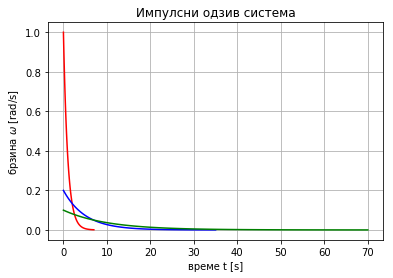

In [4]:
#impulsni odziv
t1,u1=Gs1.impulse()
t2,u2=Gs2.impulse()
t3,u3=Gs3.impulse()

plt.title("Импулсни одзив система")
plt.ylabel("брзина $\omega$ [rad/s]")
plt.xlabel("време t [s]")
plt.plot(t1,u1,'r')
plt.plot(t2,u2,'b')
plt.plot(t3,u3,'g')
plt.grid()
plt.show()

#Sa grafika mozemo da zakljucimo da se brzina odziva sistema smanjuje sa povecanjem vremenske konstante

ЗАДАТАК 2.

Нека је дата преносна функција другог реда G(s):
\begin{equation*}
G(s) =  \frac{\omega^2_n}{s^2+2c\omega_n+\omega^2_n},
\end{equation*}
при чему је са sa $\omega_n$ означена непригушена природна учестаност, а са c означен фактор релативног пригушења.
На систем делује побуда облика јединичне одскочне функције.

a) За $\omega_n>0$ одредити одзив, оценити да ли је систем стабилан и одредити у којој полуравни се налазе полови система (c=0,1).

б) За $\omega_n<0$ одредити одзив, оценити да ли је систем стабилан и одредити у којој полуравни се налазе полови система (c=0,1).

Напомена: c је из скупа [0,1].

In [5]:
#a) 

#Prvo unosimo polinom funkcije prenosa u promenljivu Gs4.

c4=0.1
Wn4=1
Gs4=signal.lti([Wn4*Wn4],[1,2*c4*Wn4,Wn4*Wn4])

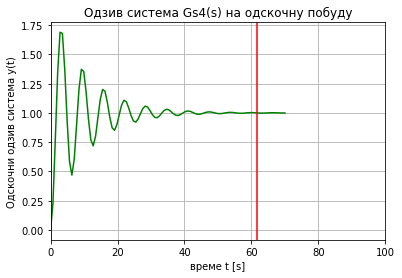

In [6]:
#Odredjujemo odziv sistema na jedinicnu pobudu (Hevisajdova fja).
t4,u4 = Gs4.step()
plt.plot(t4,u4,"g")

#Jednostavnom proverom zakljucujemo da za priblizno u4[87]=1.00 u t4[87]=61.51 nastaje stacionarno stanje. 
plt.axvline(x=61.51, color='r', linestyle='-')
plt.xlim(0,100)
plt.title("Одзив система Gs4(s) на одскочну побуду")
plt.ylabel("Одскочни одзив система y(t)")
plt.xlabel("време t [s]")
plt.grid()

plt.show()

#Zakljucujemo da je za Wn>0 sistem stabilan jer sistem posle odredjenog vremena ulazi u stacionarno stanje. 

In [7]:
#Sada proveravamo polozaj polova sistema.

#Smestamo koordinate imaginarnog dela polova u jw4 a realnog u sigma4.
jw4 = Gs4.poles.imag
sigma4 = Gs4.poles.real

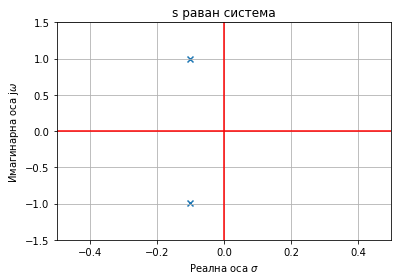

In [8]:
#Zatim iscrtavamo polozaj polova u s ravni sistema.
plt.scatter(sigma4,jw4,marker="x")

plt.xlim(-0.5,0.5)
plt.ylim(-1.5,1.5)

plt.axvline(x=0, color='r', linestyle='-')
plt.axhline(y=0, color='r', linestyle='-')

plt.title("s раван система")
plt.xlabel(r'Реална оса $\sigma$')
plt.ylabel(r'Имагинарна оса j$\omega$')

plt.grid()
plt.show()

#Polovi sistema su u levoj s poluravni, sto je ujedno i uslov da sistem bude stabilan.

In [9]:
#b) 
c5=0.1
Wn5=-1
Gs5=signal.lti([Wn5*Wn5],[1,2*c5*Wn5,Wn5*Wn5])

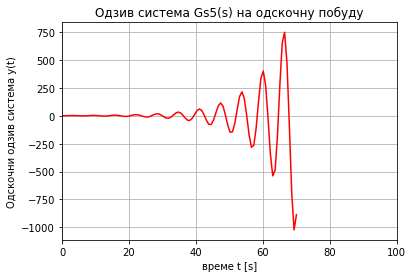

In [10]:
t5,u5 = Gs5.step()

plt.plot(t5,u5,"r")
plt.xlim(0,100)

plt.title("Одзив система Gs5(s) на одскочну побуду")
plt.ylabel("Одскочни одзив система y(t)")
plt.xlabel("време t [s]")
plt.grid()
plt.show()

plt.show()

#Kako se sa grafika odziva funkcije moze videti intuitivno zakljucujemo da je sistem
#nestabilan i da sistem nikada nece izaci iz prelaznog stanja.
#Zakljucujemo da je za Wn<0 sistem nestabilan. 

In [11]:
jw5 = Gs5.poles.imag
sigma5 = Gs5.poles.real

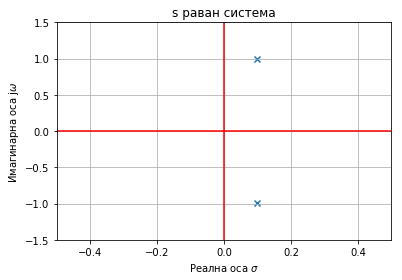

In [12]:
plt.scatter(sigma5,jw5,marker="x")

plt.xlim(-0.5,0.5)
plt.ylim(-1.5,1.5)

plt.axvline(x=0, color='r', linestyle='-')
plt.axhline(y=0, color='r', linestyle='-')

plt.title("s раван система")
plt.xlabel(r'Реална оса $\sigma$')
plt.ylabel(r'Имагинарна оса j$\omega$')

plt.grid()
plt.show()

#Polozaj polova ukazuje na cinjenicu da je sistem nestabilan jer se polovi nalaze
#u desnoj s poluravni. 